#### sklearn.cluster.KMeans
* class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [2]:
import pandas as pd

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

print(cluster_df.shape)
cluster_df.head(3)

(200, 3)


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


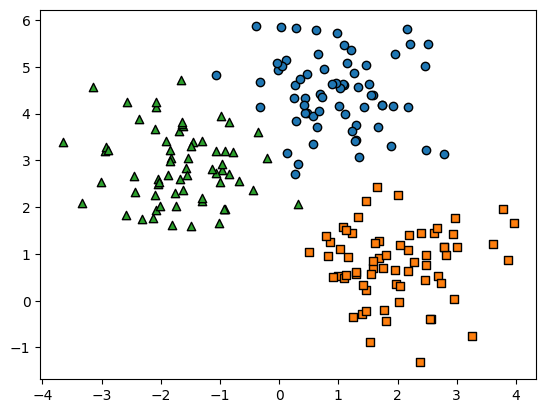

In [3]:
target_list = np.unique(y)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list: 
    target_cluster = cluster_df[cluster_df['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolors='k', marker=markers[target])

plt.show()

In [5]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
cluster_df.head()

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,2
2,1.100228,4.606317,0,2
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,2


In [7]:
kmeans.cluster_centers_

array([[ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224],
       [ 0.990103  ,  4.44666506]])

In [8]:
kmeans.labels_

array([1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0,
       2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0,
       2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       2, 0])

In [9]:
kmeans.n_iter_

5

In [11]:
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


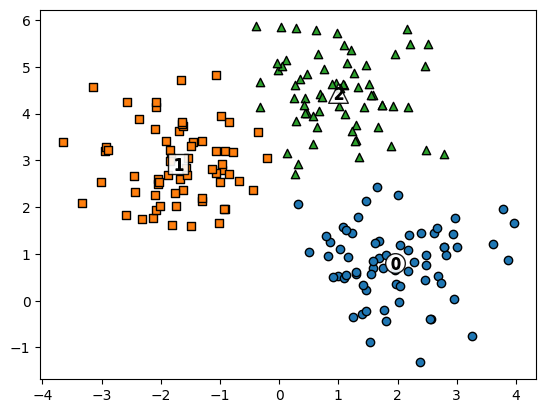

In [13]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolors = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)

plt.show()

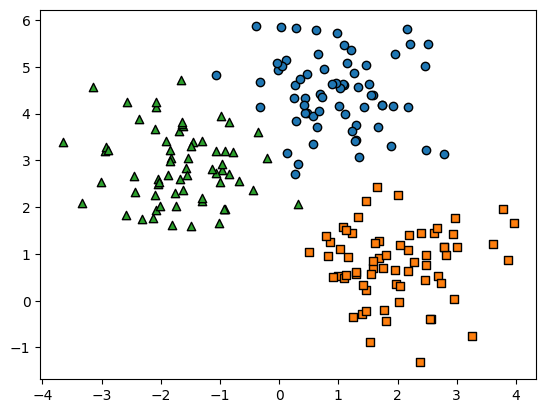

In [14]:
target_list = np.unique(y)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list: 
    target_cluster = cluster_df[cluster_df['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolors='k', marker=markers[target])

plt.show()